# Зниження розмірності і візуалізація даних


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split

# Get the Data

In [ ]:
df = pd.read_csv("/content/ds_salaries.csv")
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3755 non-null   int64 
 1   experience_level    3755 non-null   object
 2   employment_type     3755 non-null   object
 3   job_title           3755 non-null   object
 4   salary              3755 non-null   int64 
 5   salary_currency     3755 non-null   object
 6   salary_in_usd       3755 non-null   int64 
 7   employee_residence  3755 non-null   object
 8   remote_ratio        3755 non-null   int64 
 9   company_location    3755 non-null   object
 10  company_size        3755 non-null   object
dtypes: int64(4), object(7)
memory usage: 322.8+ KB


# Data Preprocessing

In [ ]:
df.isnull().sum()

,0
work_year,0
experience_level,0
employment_type,0
job_title,0
salary,0
salary_currency,0
salary_in_usd,0
employee_residence,0
remote_ratio,0
company_location,0


In [ ]:
print(df['work_year'].value_counts())

work_year
2023    1785
2022    1664
2021     230
2020      76
Name: count, dtype: int64


In [ ]:
df.drop(columns=['salary', 'salary_currency'], inplace=True)

In [ ]:
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


In [ ]:
df['job_title'].describe()

,job_title
count,3755
unique,93
top,Data Engineer
freq,1040


In [ ]:
df.nlargest(3, 'salary_in_usd')

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
3522,2020,MI,FT,Research Scientist,450000,USD,450000,US,0,US,M
2011,2022,MI,FT,Data Analyst,350000,GBP,430967,GB,0,GB,M
528,2023,SE,FT,AI Scientist,1500000,ILS,423834,IL,0,IL,L


In [ ]:
df.nsmallest(3, 'salary_in_usd')

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
2684,2022,MI,FT,NLP Engineer,120000,CZK,5132,CZ,100,CZ,M
2578,2021,EN,FT,Power BI Developer,400000,INR,5409,IN,50,IN,L
3537,2021,MI,PT,3D Computer Vision Researcher,400000,INR,5409,IN,50,IN,M


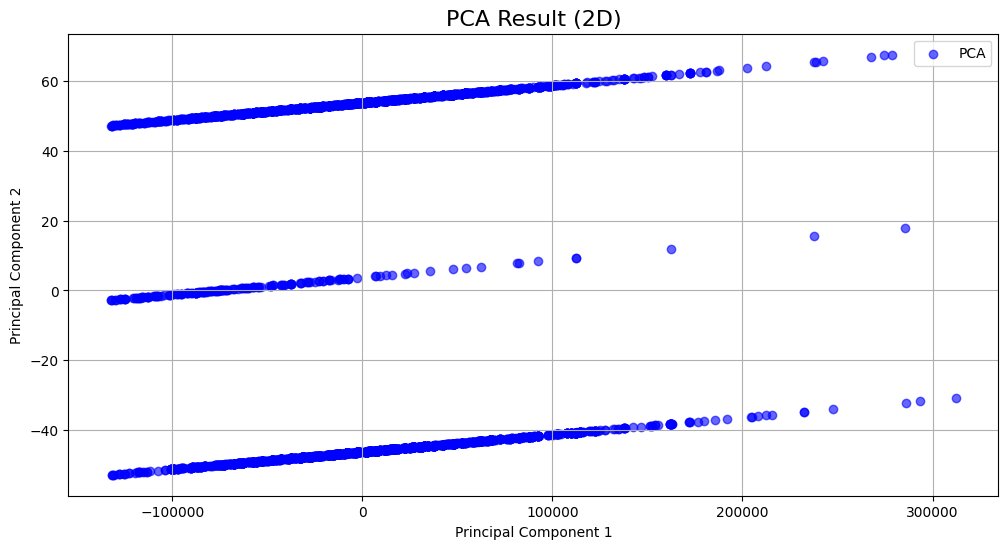

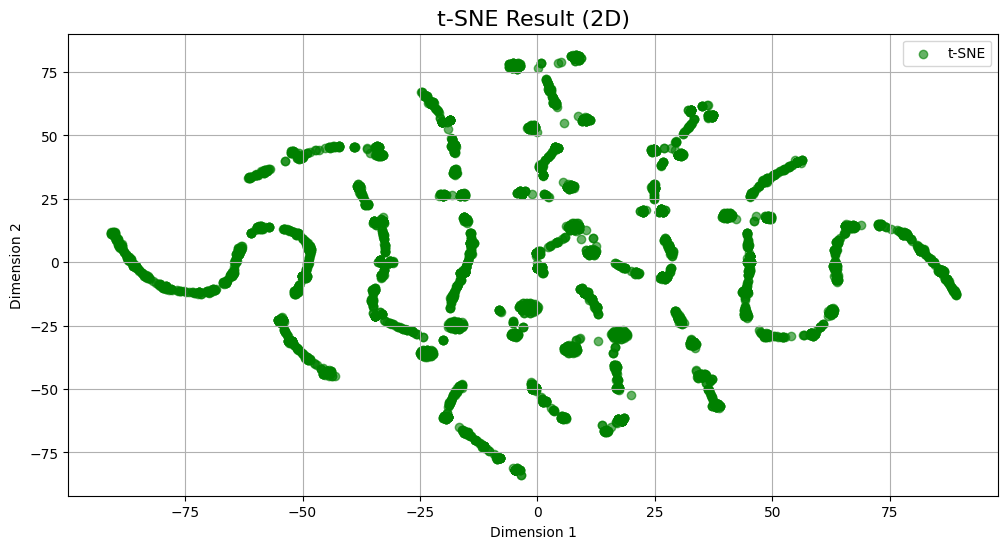

In [ ]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# Select numerical features for dimensionality reduction
features = ['salary_in_usd', 'remote_ratio']
data_features = df[features]

# Apply PCA to reduce dimensions to 2D
pca = PCA(n_components=2)
pca_result = pca.fit_transform(data_features)

# Apply t-SNE to reduce dimensions to 2D
tsne = TSNE(n_components=2, random_state=42)
tsne_result = tsne.fit_transform(data_features)

# Visualize PCA results
plt.figure(figsize=(12, 6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c='blue', alpha=0.6, label='PCA')
plt.title('PCA Result (2D)', fontsize=16)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(True)
plt.show()

# Visualize t-SNE results
plt.figure(figsize=(12, 6))
plt.scatter(tsne_result[:, 0], tsne_result[:, 1], c='green', alpha=0.6, label='t-SNE')
plt.title('t-SNE Result (2D)', fontsize=16)
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.legend()
plt.grid(True)
plt.show()

#Висновок
PCA (Перший графік) показує, що кожна точка на графіку відповідає одному прикладу з датасету, представленому у 2D-просторі (дві головні компоненти).
PCA обирає такі напрямки даних, які максимально пояснюють варіацію (розкид)значень. Ми бачимо лінійно витягнуті структури. Це вказує на те, що у даних присутні певні глобальні закономірності (наприклад, зв’язок між salary_in_usd та remote_ratio). Розташування точок уздовж кількох ліній свідчить, що дані мають певну залежність. Це може бути пов'язано з тим, що зарплати кластеризуються за рівнями (наприклад, малі компанії платять менше, великі більше). Глобальна структура зберігається добре, але локальні деталі можуть бути втрачені. Складно побачити чіткі кластери, якщо дані мають складну нелінійну структуру.
t-SNE (Другий графік) показує, що тут збережена локальна структура. Ми бачимо кілька груп (кластерів), які можуть відповідати різним категоріям або рівням вхідних ознак. На цьому графіку можна помітити, що дані утворюють кілька ізольованих груп. Це може означати, що, наприклад, працівники з високими зарплатами та низьким рівнем віддаленої роботи формують один кластер, а з низькими зарплатами — інший.
